In [1]:
import torch
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from label_dict import protein_to_num_single_cells, protein_to_num_full
from matplotlib import cm

In [2]:
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/u2os_df.csv')

In [4]:
features, protein_localizations, cell_lines, IDs = torch.load(
        '/scr/mdoron/Dino4Cells/U2-OS_single_channel_r_0.0005/features.pth'
    )
features_b, protein_localizations_b, cell_lines_b, IDs_b = torch.load(
        '/scr/mdoron/Dino4Cells/U2-OS_single_channel_b_0.0005/features.pth'
    )

In [14]:
features_y, protein_localizations_y, cell_lines_y, IDs_y = torch.load(
        '/scr/mdoron/Dino4Cells/U2-OS_single_channel_y_0.0005/features.pth'
    )
features_g, protein_localizations_g, cell_lines_g, IDs_g = torch.load(
        '/scr/mdoron/Dino4Cells/U2-OS_single_channel_g_0.0005/features.pth'
    )

In [16]:
features_all = torch.concat((features,features_b,features_y,features_g),1)
features_all.shape

torch.Size([160642, 3072])

In [17]:
def get_embeddings(features):
    scaled_features = StandardScaler().fit_transform(features.numpy())
    reducer = UMAP(init="random", random_state=42)
    embedding = reducer.fit_transform(scaled_features)
    return embedding

In [18]:
def plot_UMAP(df, labels, embedding, title):
    cmap = cm.nipy_spectral
    mat, labels = get_col_matrix(df, labels)
    plt.figure(figsize=(10, 10))
    for i in range(mat.shape[1]):
        indices = np.where(mat[:, i])[0]
        plt.scatter(
            embedding[indices, 0],
            embedding[indices, 1],
            s=0.1,
            label=labels[i],
            color=cmap(i / mat.shape[1]),
        )
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.title(title, fontsize=30)
    lgnd = plt.legend(bbox_to_anchor=(1, 1))
    for h in lgnd.legendHandles:
        h._sizes = [30]

In [19]:
def get_col_matrix(df, labels):
    if len(labels) == 1:
        values = df[labels[0]]
        unique_values = sorted(np.unique(values))
        mat = np.zeros((len(df), len(unique_values)))
        for ind, value in enumerate(unique_values):
            mat[np.where(values == value)[0], ind] = 1
        columns = unique_values
    else:
        mat = df[sorted(labels)].values.astype(int)
        columns = sorted(labels)
    return mat, columns

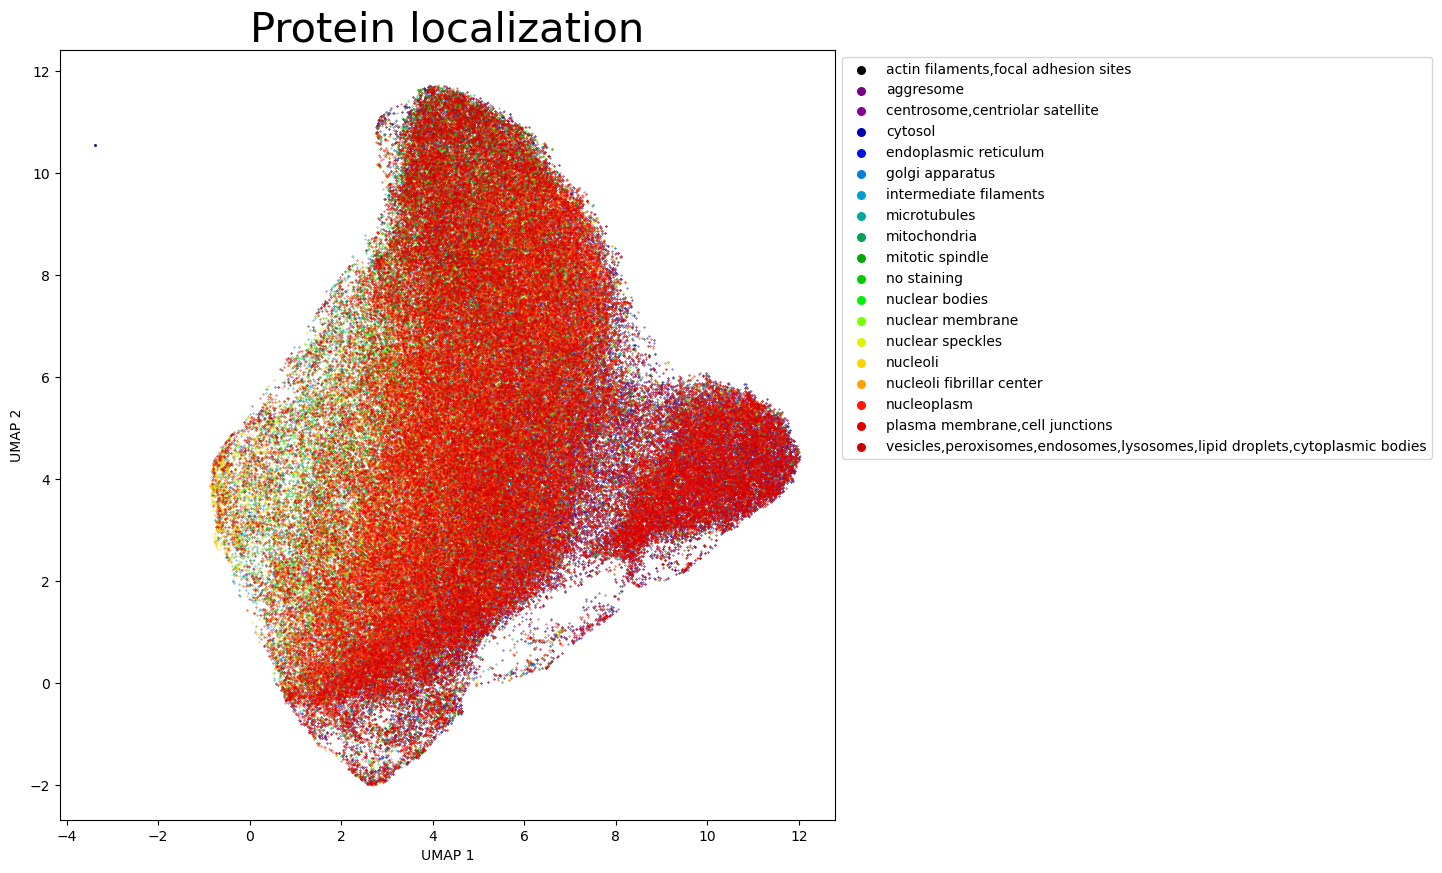

In [20]:
embedding = get_embeddings(features_all)
plot_UMAP(df, protein_to_num_single_cells, embedding, "Protein localization")
plt.savefig('U2-OS_single_channel_concatenated.png')